In [234]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler


# Data Loading

In [235]:


# Dosyanın yolu ve adı
dosya = 'suwen.xlsx'

# Excel dosyasını oku
data = pd.read_excel(dosya)



In [236]:
data.head()

,Tarih,Kapanış,Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,21-04-2022,4.72,4.62,5.03,4.85,889266703,56,14.6869,2557,1066,73,NaN,NaN
1,22-04-2022,4.53,4.47,4.76,4.63,164854414,56,14.7333,2473,1022,69,420.0,29.0
2,25-04-2022,4.47,4.38,4.57,4.45,79027661,56,14.7705,2483,1009,68,415.0,28.0
3,26-04-2022,4.40,4.40,4.62,4.50,39792552,56,14.7936,2418,993,67,408.0,28.0
4,27-04-2022,4.48,4.41,4.68,4.57,115135291,56,14.8229,2451,1011,68,415.0,28.0


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tarih                 397 non-null    object 
 1   Kapanış               397 non-null    float64
 2   Min(TL)               397 non-null    float64
 3   Max(TL)               397 non-null    float64
 4   AOF(TL)               397 non-null    float64
 5   Hacim(TL)             397 non-null    int64  
 6   Sermaye(mn TL)        397 non-null    int64  
 7   USDTRY                397 non-null    float64
 8   BIST 100              397 non-null    int64  
 9   PiyasaDeğeri(mn TL)   397 non-null    int64  
 10  PiyasaDeğeri(mn USD)  397 non-null    int64  
 11  HalkaAçık PD(mn TL)   396 non-null    float64
 12  HalkaAçık PD(mn USD)  396 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 40.4+ KB


## Spliting Data as Train and Validation

In [238]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 397
Train data length : 278
Validation data lenth : 119


In [239]:
train_data = data[:length_train].iloc[:,:2]
train_data['Tarih'] = pd.to_datetime(train_data['Tarih'])  # converting to date time object
train_data

,Tarih,Kapanış
0,2022-04-21,4.72
1,2022-04-22,4.53
2,2022-04-25,4.47
3,2022-04-26,4.40
4,2022-04-27,4.48
...,...,...
273,2023-05-31,15.32
274,2023-01-06,15.74
275,2023-02-06,15.74
276,2023-05-06,15.69


In [240]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Tarih'] = pd.to_datetime(validation_data['Tarih'])
validation_data

,Tarih,Kapanış
278,2023-07-06,15.57
279,2023-08-06,15.33
280,2023-09-06,15.14
281,2023-12-06,14.80
282,2023-06-13,14.49
...,...,...
392,2023-11-20,19.60
393,2023-11-21,20.48
394,2023-11-22,20.06
395,2023-11-23,19.60


In [241]:
dataset_train = train_data.Kapanış.values
dataset_train.shape

(278,)

In [242]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(278, 1)

## Normalization 0-1

In [243]:

scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(278, 1)

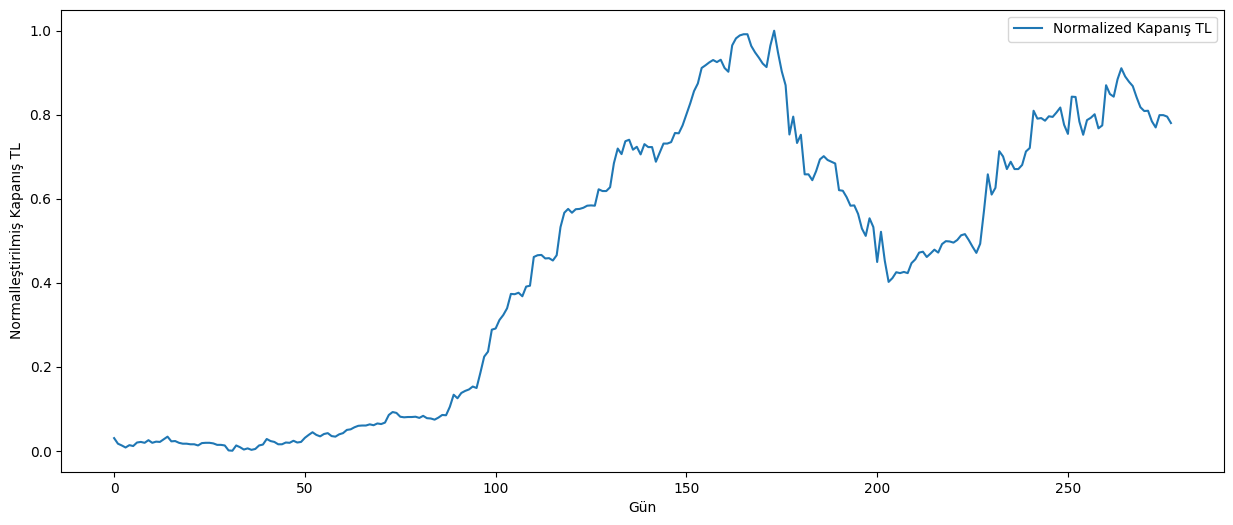

In [244]:

plt.subplots(figsize=(15, 6))
plt.plot(dataset_train_scaled, label='Normalized Kapanış TL')
plt.xlabel("Gün")
plt.ylabel("Normalleştirilmiş Kapanış TL")
plt.legend()
plt.show()


## Creating X_train and y_train from Train data

In [245]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (228, 50)
Shape of y_train before reshape : (228,)


In [246]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (228, 50, 1)
Shape of y_train after reshape : (228, 1)


That means we have 228 rows, each row has 50 rows and 1 column


In [247]:
X_train[0]

array([[0.03000698],
       [0.01674808],
       [0.01256106],
       [0.0076762 ],
       [0.0132589 ],
       [0.01116539],
       [0.01953943],
       [0.0209351 ],
       [0.01884159],
       [0.02512212],
       [0.01884159],
       [0.02163294],
       [0.0209351 ],
       [0.02721563],
       [0.03349616],
       [0.02233077],
       [0.02302861],
       [0.01884159],
       [0.01674808],
       [0.01674808],
       [0.01535241],
       [0.01535241],
       [0.01256106],
       [0.01814375],
       [0.01884159],
       [0.01884159],
       [0.01744592],
       [0.01395673],
       [0.01395673],
       [0.01256106],
       [0.00069784],
       [0.        ],
       [0.01256106],
       [0.00837404],
       [0.00279135],
       [0.00558269],
       [0.00209351],
       [0.00418702],
       [0.01256106],
       [0.01465457],
       [0.02791347],
       [0.02302861],
       [0.0209351 ],
       [0.01535241],
       [0.01535241],
       [0.01953943],
       [0.01884159],
       [0.023

In [248]:
y_train[0]

array([0.03070482])

In [249]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
8/8 [==============================] - 4s 44ms/step - loss: 0.7263 - accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 42ms/step - loss: 0.4527 - accuracy: 0.0044
Epoch 3/50
8/8 [==============================] - 0s 40ms/step - loss: 0.4207 - accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 41ms/step - loss: 0.3500 - accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 42ms/step - loss: 0.3607 - accuracy: 0.0044
Epoch 6/50
8/8 [==============================] - 0s 47ms/step - loss: 0.3007 - accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 1s 75ms/step - loss: 0.2681 - accuracy: 0.0044
Epoch 8/50
8/8 [==============================] - 1s 80ms/step - loss: 0.2757 - accuracy: 0.0044
Epoch 9/50
8/8 [==============================] - 1s 77ms/step - loss: 0.2326 - accuracy: 0.0044
Epoch 10/50
8/8 [==============================] - 1s 82ms/step - loss: 0.2993 - accuracy: 0.0044
Epoch 11/50
8

In [250]:
history.history["loss"]

[0.7262865900993347,
 0.4527137279510498,
 0.4207020103931427,
 0.3499689996242523,
 0.3607197701931,
 0.30069002509117126,
 0.26807793974876404,
 0.2756812870502472,
 0.2325916737318039,
 0.29928696155548096,
 0.28868696093559265,
 0.26420581340789795,
 0.2337135374546051,
 0.2744912803173065,
 0.21418365836143494,
 0.19927376508712769,
 0.21570274233818054,
 0.18932852149009705,
 0.21214692294597626,
 0.1733938306570053,
 0.1937309056520462,
 0.1920085847377777,
 0.17481805384159088,
 0.16671830415725708,
 0.1355368196964264,
 0.13404445350170135,
 0.14700467884540558,
 0.1169072687625885,
 0.13349099457263947,
 0.12047919631004333,
 0.1335626095533371,
 0.10926523804664612,
 0.094041608273983,
 0.1051841527223587,
 0.10834679752588272,
 0.1031302958726883,
 0.11527463793754578,
 0.09473459422588348,
 0.07729195803403854,
 0.09488828480243683,
 0.08075716346502304,
 0.08159709721803665,
 0.07560968399047852,
 0.07881799340248108,
 0.07894252985715866,
 0.07936891913414001,
 0.0610837

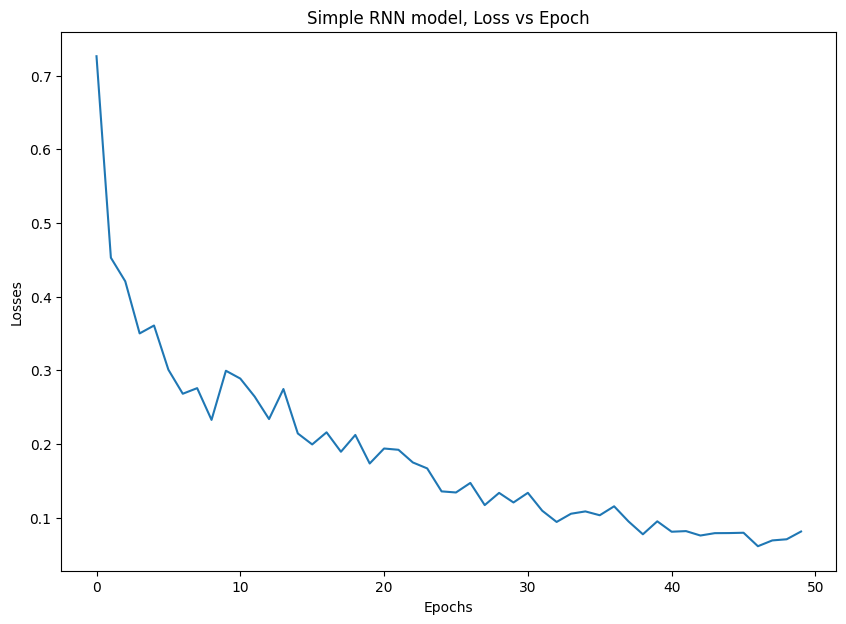

In [251]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

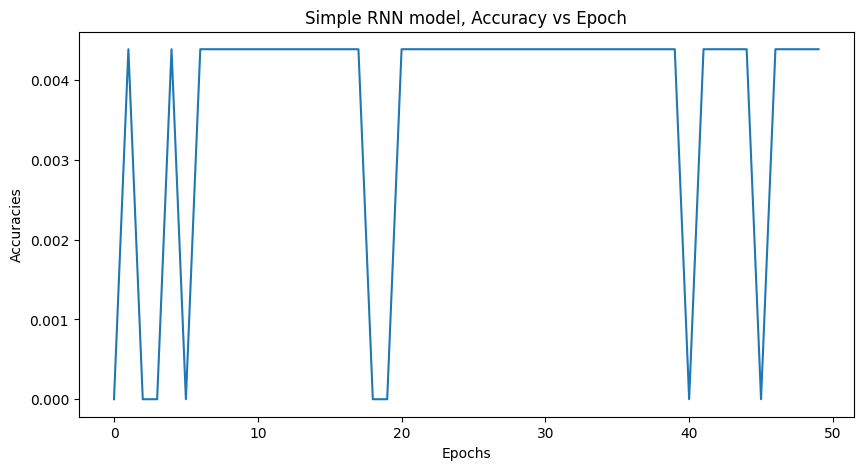

In [252]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [253]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

8/8 [==============================] - 1s 13ms/step


(228, 1)

In [254]:

y_train = y_train.reshape(-1, 1)


In [255]:
y_train = scaler.inverse_transform(y_train)

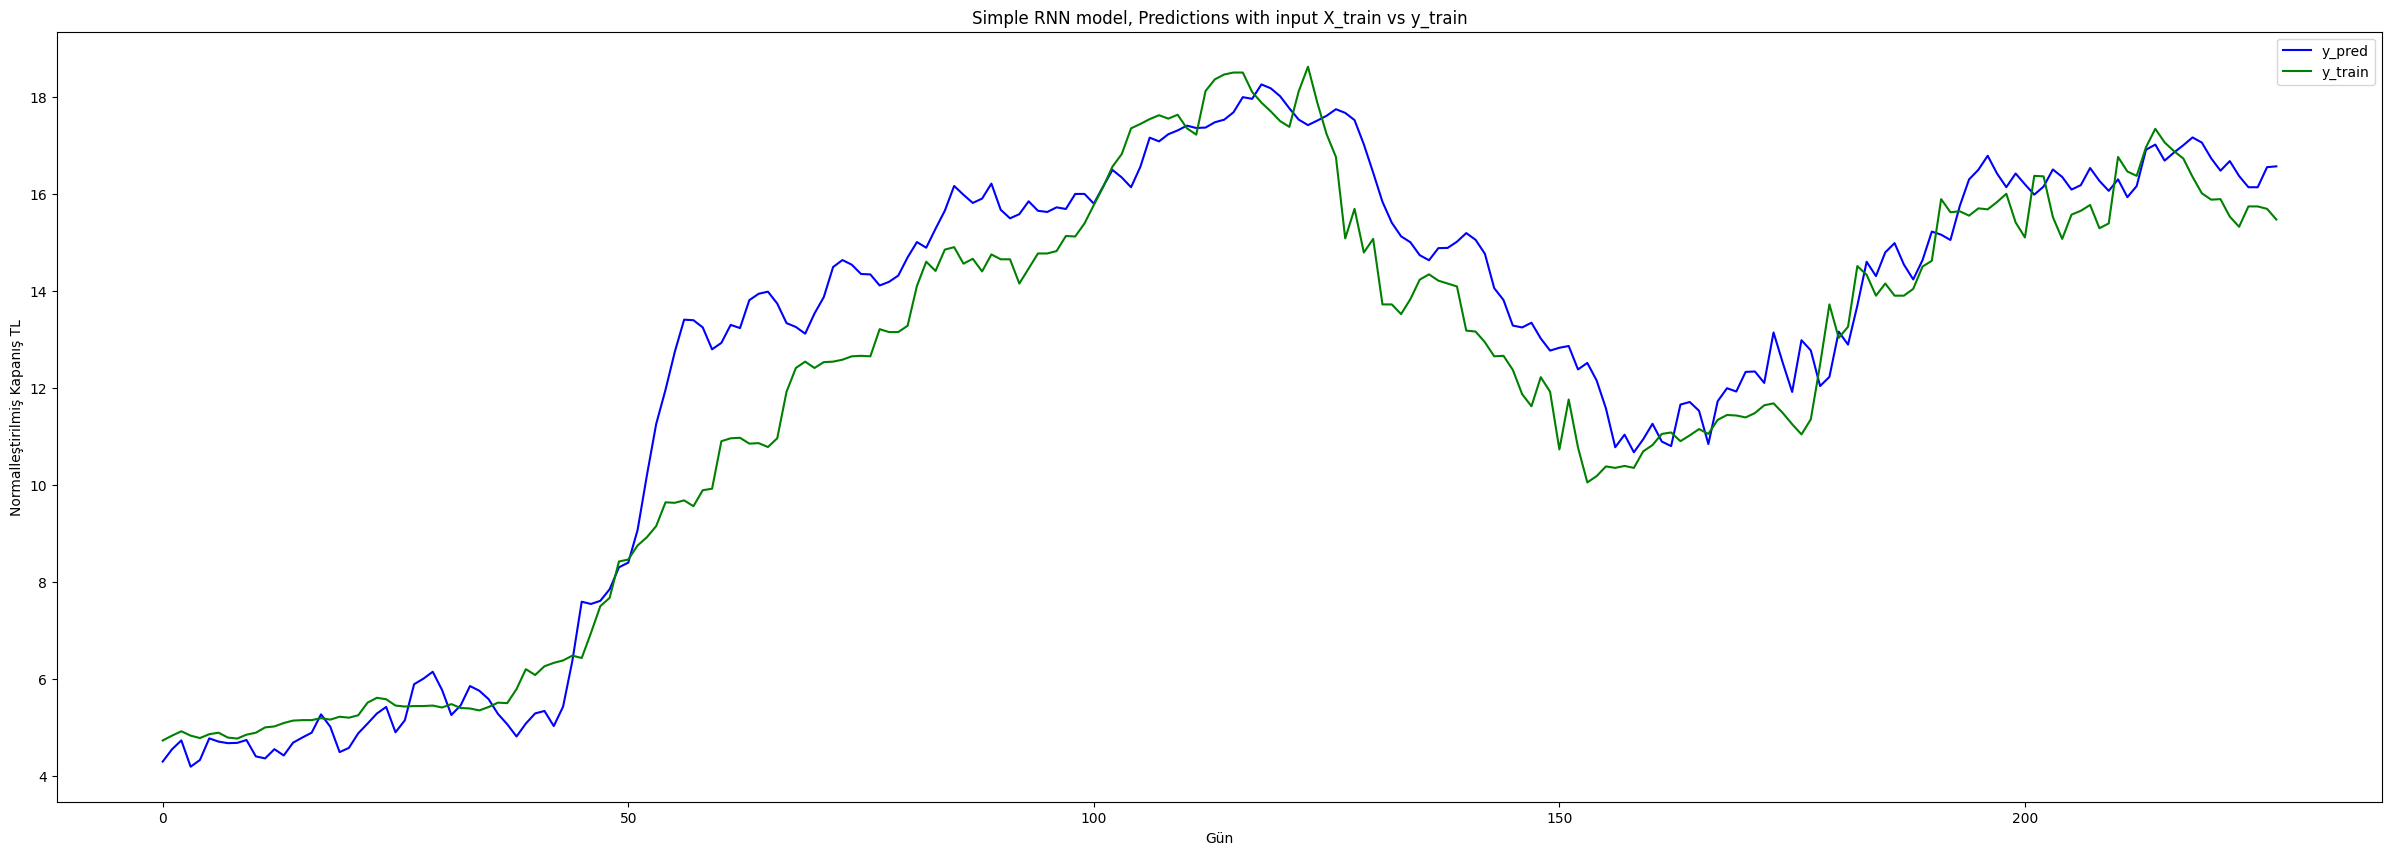

In [256]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Gün")
plt.ylabel("Normalleştirilmiş Kapanış TL")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

## Creating Test Dataset from Validation Data

In [257]:
dataset_validation = validation_data.Kapanış.values  # getting "KAPANIŞ" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (119, 1)


 Creating X_test and y_test

In [258]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Converting to array

In [259]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [260]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (69, 50)
Shape of y_test before reshape : (69,)


Reshape

In [261]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [262]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (69, 50, 1)
Shape of y_test after reshape : (69, 1)


## Evaluating with Validation Data

In [263]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

3/3 [==============================] - 0s 16ms/step
Shape of y_pred_of_test : (69, 1)


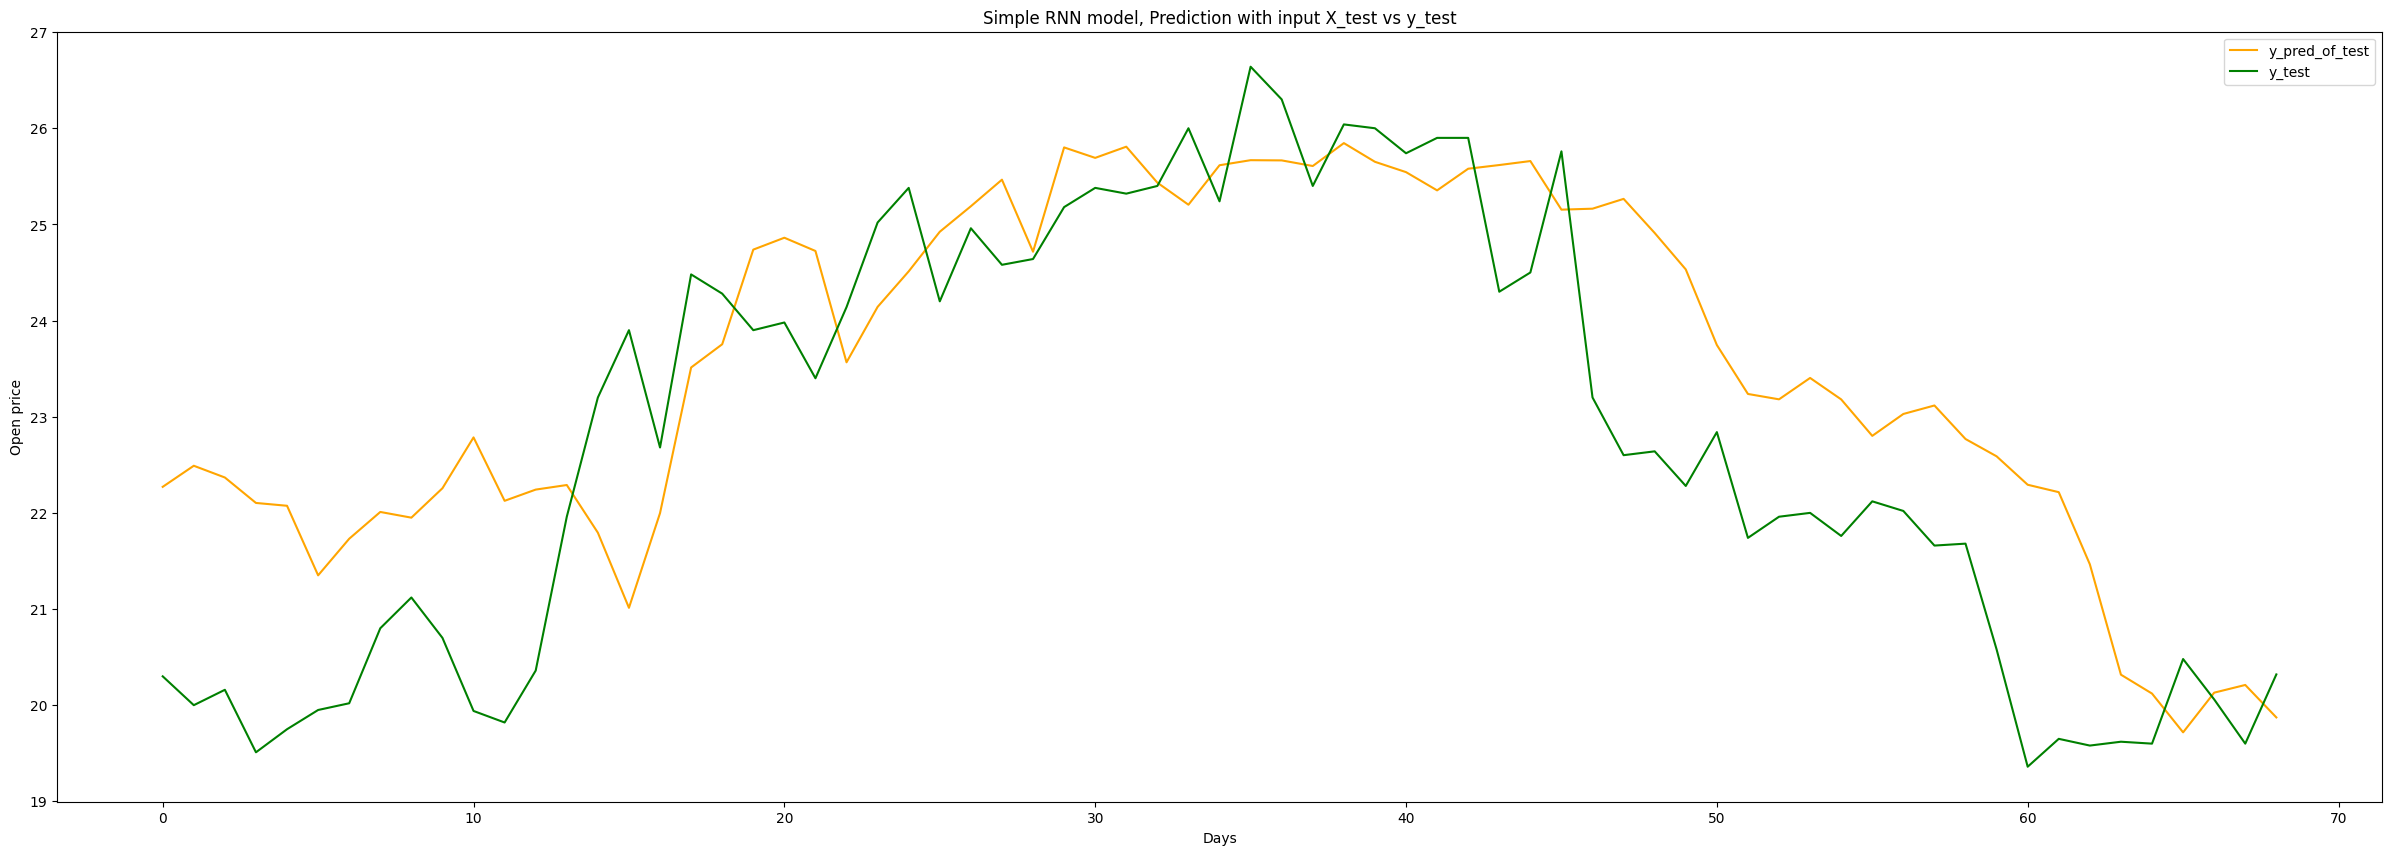

In [264]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

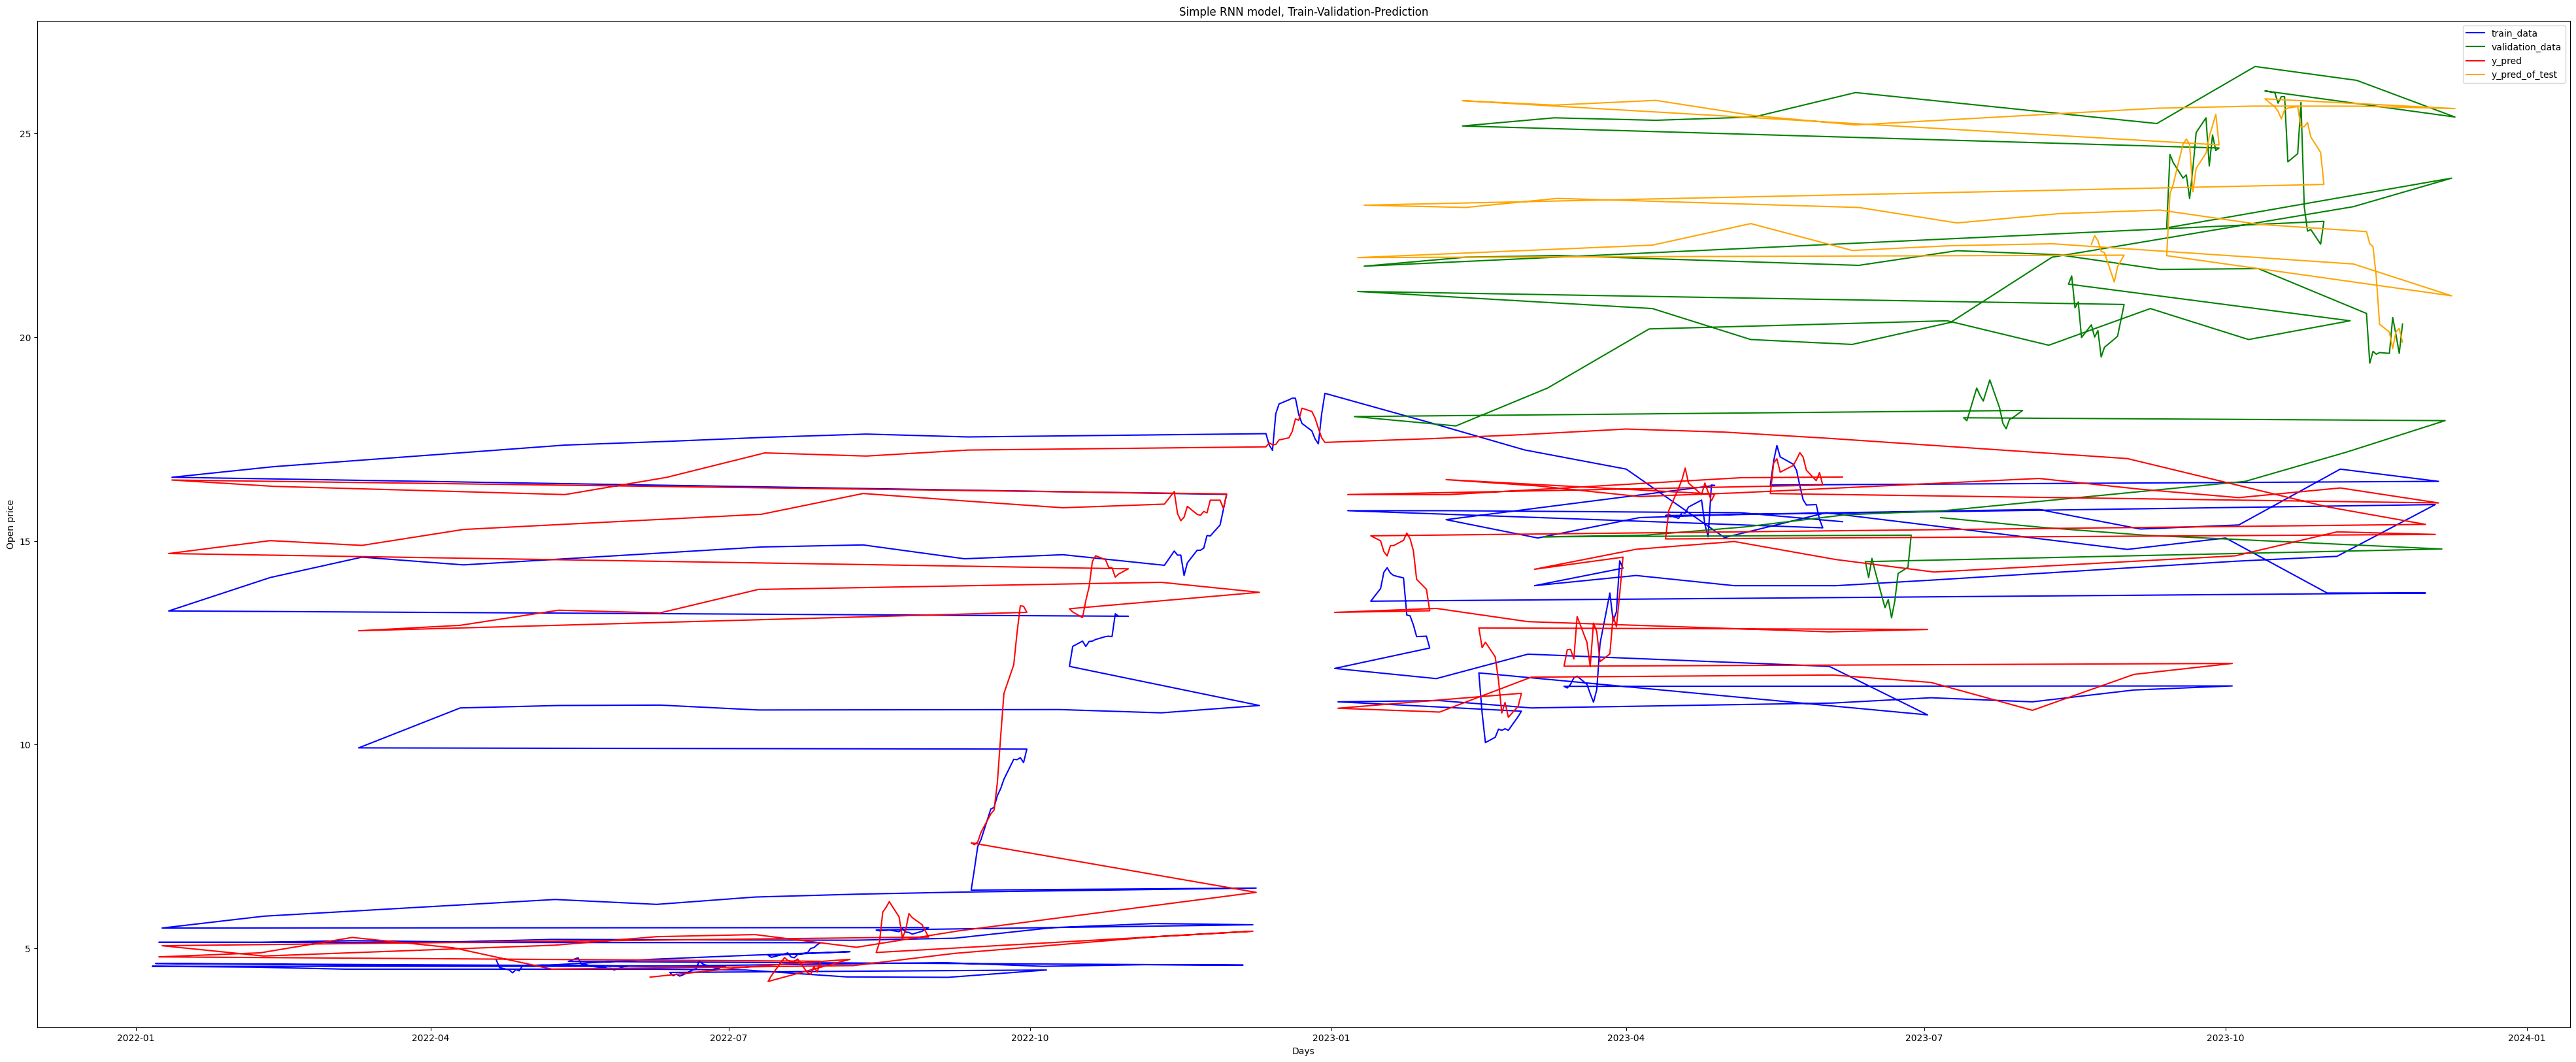

In [266]:
# Visualisation
plt.subplots(figsize =(50,20))
plt.plot(train_data.Tarih, train_data.Kapanış, label = "train_data", color = "b")
plt.plot(validation_data.Tarih, validation_data.Kapanış, label = "validation_data", color = "g")
plt.plot(train_data.Tarih.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Tarih.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()